#Seatwork 11.1 Exploratory Data Analysis for Machine Learning
Submitted by: Dela Cruz, Eugene D.G.

Submitted to: Engr. Roman Richard

#Import/download libraries

In [14]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.5 MB/s eta 0:00:00


In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
%matplotlib inline

#import dataset

In [2]:
pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

# metadata
print(automobile.metadata)

# variable information
print(automobile.variables)


{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
Xw = wine.data.features
yw = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

#Data wrangling

In [24]:
X.head()

price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore fuel-system  engine-size  ...  length wheel-base  \
0    2.68  3.47        mpfi          130  ...   168.8       88.6   
1    2.68  3.47        mpfi          130  ...   168.8       88.6   
2    3.47  2.68        mpfi          152  ...   171.2       94.5   
3    3.40  3.19        mpfi          109  ...   176.6       99.8   
4    3.40  3.19        mpfi          136  ...   176.6       99.4   

   engine-location  drive-wheels   body-style  num-of-doors  aspiration  \
0            front           rwd  convertible           2.0         std   
1            front           rwd  convertible           2.0         std   
2            front           rwd    hatchback           2.0         std   
3            front           fwd        sedan           4.0         std   
4            front           4wd        sedan           4.0         std   

  fuel-type         make normalized-losses  
0       gas  alfa-romero               NaN  
1       gas  alfa-romero               NaN  
2       gas  alfa-romero               NaN  
3       gas         audi             164.0  
4       gas         audi             164.0  

[5 rows x 25 columns]

In [10]:
y.head()

symboling
0          3
1          3
2          1
3          2
4          2

In [11]:
Xw.head()

Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  
0                          3.92     1065  
1                          3.40     1050  
2                          3.17     1185  
3                          3.45     1480  
4                          2.93      735

In [19]:
yw.head()

class
0      1
1      1
2      1
3      1
4      1

In [20]:
atmb = pd.concat([X,y], axis = 1) #atmb for automobile
atmb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [21]:
wine = pd.concat([Xw, yw], axis = 1)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

In [27]:
atmb.head()

price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore fuel-system  engine-size  ...  wheel-base engine-location  \
0    2.68  3.47        mpfi          130  ...        88.6           front   
1    2.68  3.47        mpfi          130  ...        88.6           front   
2    3.47  2.68        mpfi          152  ...        94.5           front   
3    3.40  3.19        mpfi          109  ...        99.8           front   
4    3.40  3.19        mpfi          136  ...        99.4           front   

   drive-wheels   body-style  num-of-doors  aspiration  fuel-type  \
0           rwd  convertible           2.0         std        gas   
1           rwd  convertible           2.0         std        gas   
2           rwd    hatchback           2.0         std        gas   
3           fwd        sedan           4.0         std        gas   
4           4wd        sedan           4.0         std        gas   

          make normalized-losses symboling  
0  alfa-romero               NaN         3  
1  alfa-romero               NaN         3  
2  alfa-romero               NaN         1  
3         audi             164.0         2  
4         audi             164.0         2  

[5 rows x 26 columns]

In [26]:
atmb.describe(include='all')

price  highway-mpg    city-mpg     peak-rpm  horsepower  \
count     201.000000   205.000000  205.000000   203.000000  203.000000   
unique           NaN          NaN         NaN          NaN         NaN   
top              NaN          NaN         NaN          NaN         NaN   
freq             NaN          NaN         NaN          NaN         NaN   
mean    13207.129353    30.751220   25.219512  5125.369458  104.256158   
std      7947.066342     6.886443    6.542142   479.334560   39.714369   
min      5118.000000    16.000000   13.000000  4150.000000   48.000000   
25%      7775.000000    25.000000   19.000000  4800.000000   70.000000   
50%     10295.000000    30.000000   24.000000  5200.000000   95.000000   
75%     16500.000000    34.000000   30.000000  5500.000000  116.000000   
max     45400.000000    54.000000   49.000000  6600.000000  288.000000   

        compression-ratio      stroke        bore fuel-system  engine-size  \
count          205.000000  201.000000  201.000000         205   205.000000   
unique                NaN         NaN         NaN           8          NaN   
top                   NaN         NaN         NaN        mpfi          NaN   
freq                  NaN         NaN         NaN          94          NaN   
mean            10.142537    3.255423    3.329751         NaN   126.907317   
std              3.972040    0.316717    0.273539         NaN    41.642693   
min              7.000000    2.070000    2.540000         NaN    61.000000   
25%              8.600000    3.110000    3.150000         NaN    97.000000   
50%              9.000000    3.290000    3.310000         NaN   120.000000   
75%              9.400000    3.410000    3.590000         NaN   141.000000   
max             23.000000    4.170000    3.940000         NaN   326.000000   

        ...  wheel-base engine-location  drive-wheels  body-style  \
count   ...  205.000000             205           205         205   
unique  ...         NaN               2             3           5   
top     ...         NaN           front           fwd       sedan   
freq    ...         NaN             202           120          96   
mean    ...   98.756585             NaN           NaN         NaN   
std     ...    6.021776             NaN           NaN         NaN   
min     ...   86.600000             NaN           NaN         NaN   
25%     ...   94.500000             NaN           NaN         NaN   
50%     ...   97.000000             NaN           NaN         NaN   
75%     ...  102.400000             NaN           NaN         NaN   
max     ...  120.900000             NaN           NaN         NaN   

        num-of-doors  aspiration  fuel-type    make normalized-losses  \
count     203.000000         205        205     205        164.000000   
unique           NaN           2          2      22               NaN   
top              NaN         std        gas  toyota               NaN   
freq             NaN         168        185      32               NaN   
mean        3.123153         NaN        NaN     NaN        122.000000   
std         0.994841         NaN        NaN     NaN         35.442168   
min         2.000000         NaN        NaN     NaN         65.000000   
25%         2.000000         NaN        NaN     NaN         94.000000   
50%         4.000000         NaN        NaN     NaN        115.000000   
75%         4.000000         NaN        NaN     NaN        150.000000   
max         4.000000         NaN        NaN     NaN        256.000000   

         symboling  
count   205.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean      0.834146  
std       1.245307  
min      -2.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max       3.000000  

[11 rows x 26 columns]

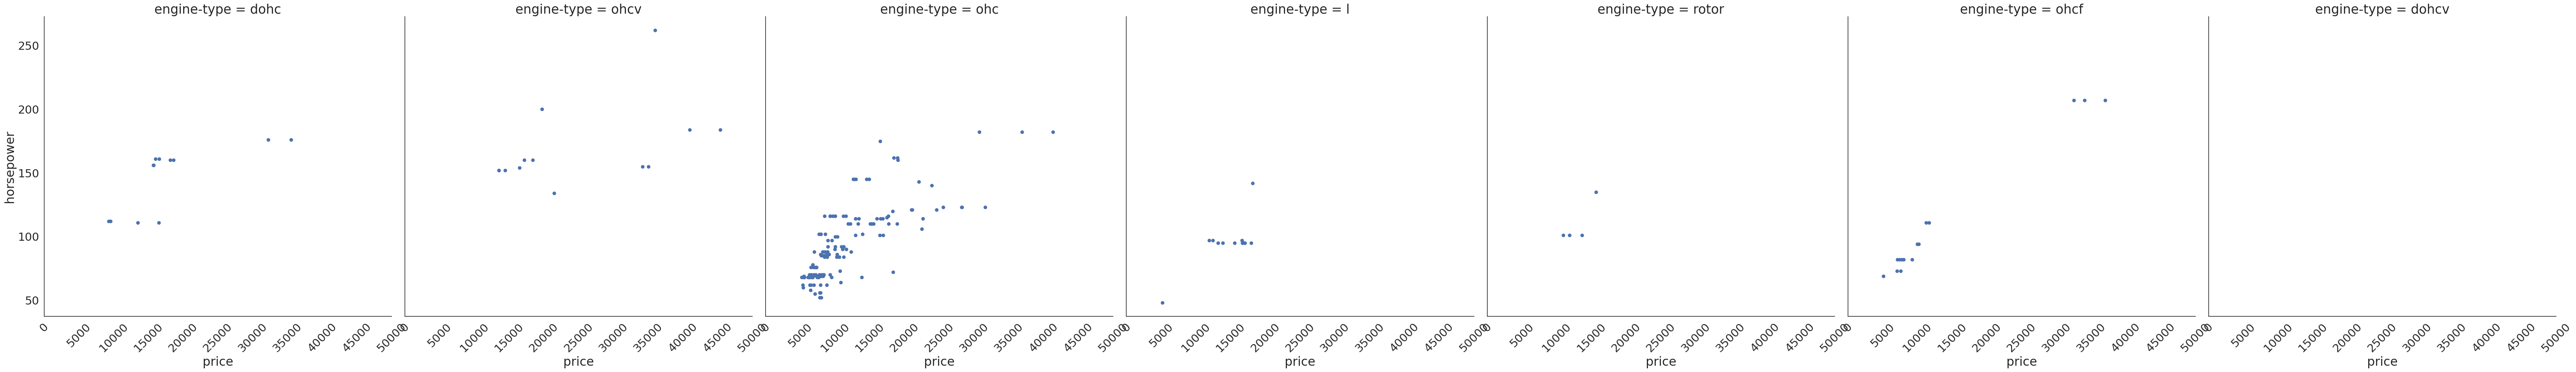

In [80]:
sns.set(rc={'figure.figsize':(20,10)}, style='white', font_scale=2)

g = sns.FacetGrid(atmb, col='engine-type', height=10)
g = g.map(plt.scatter, "price", "horsepower")
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()

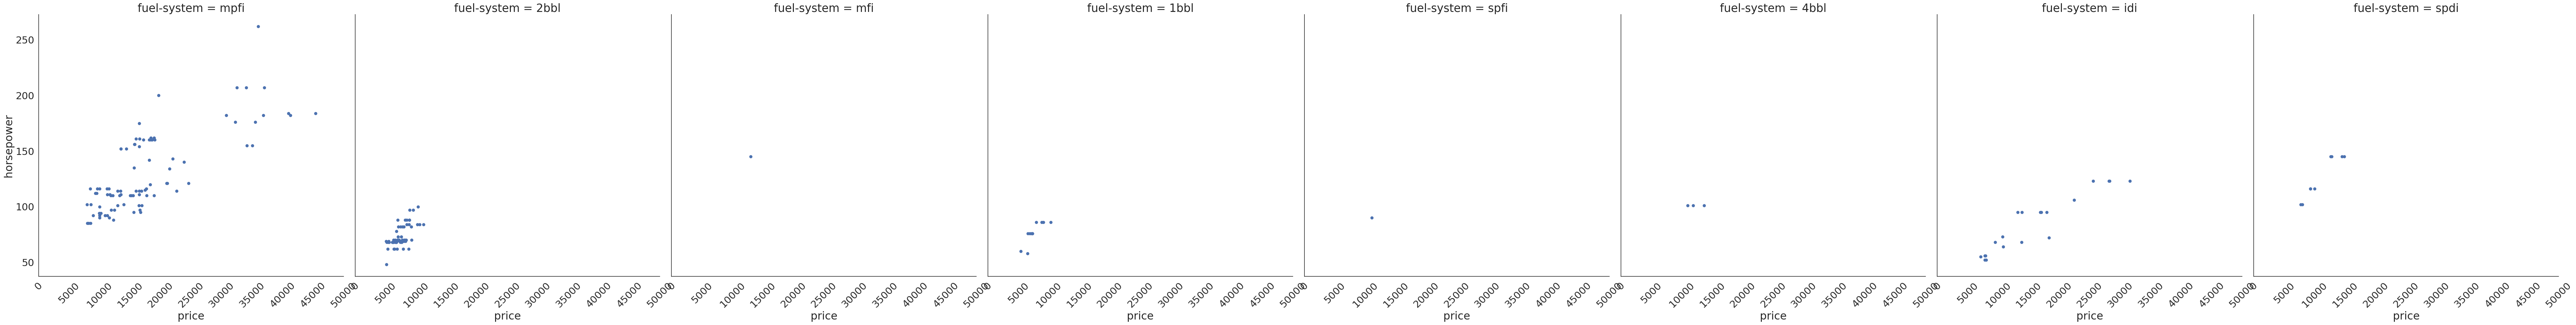

In [44]:
sns.set(rc={'figure.figsize':(20,10)}, style='white', font_scale=2)

g = sns.FacetGrid(atmb, col='fuel-system', height=10)
g = g.map(plt.scatter, "price", "horsepower")
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()

In [45]:
wine.head()

Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  class  
0                          3.92     1065      1  
1                          3.40     1050      1  
2                          3.17     1185      1  
3                          3.45     1480      1  
4                          2.93      735      1

In [65]:
wine.describe(include='all')

Alcohol   Malicacid         Ash  Alcalinity_of_ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_intensity         Hue  0D280_0D315_of_diluted_wines      Proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

            class  
count  178.000000  
mean     1.938202  
std      0.775035  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000

In [81]:
wine.tail()

Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     0D280_0D315_of_diluted_wines  Proline  class Malicacid_binned  
173                          1.74      740      3             High  
174                          1.56      750      3             High  
175                          1.56      835      3             High  
176                          1.62      840      3    Above Average  
177                          1.60      560      3             High

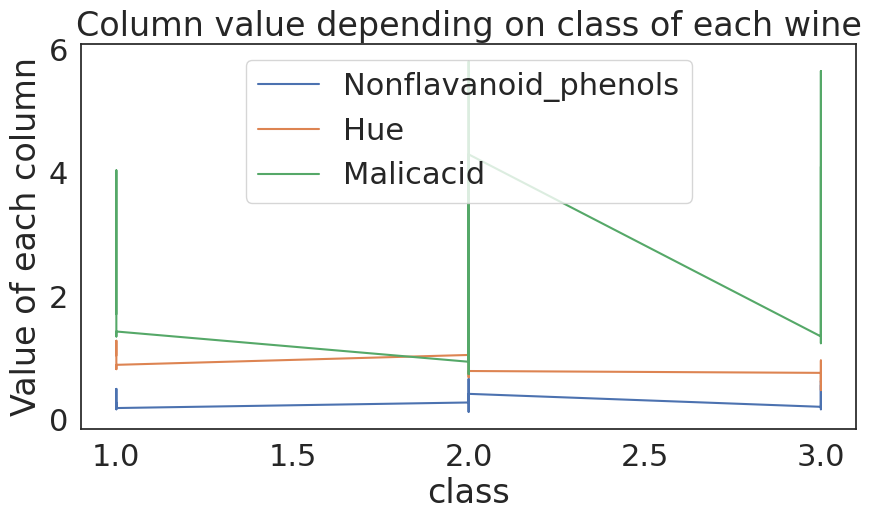

In [66]:
wine.plot(
    kind='line', y=['Nonflavanoid_phenols', 'Hue', 'Malicacid'], x='class',
    title='Column value depending on class of each wine',
    figsize=(10,5)).set_ylabel('Value of each column')
plt.show()

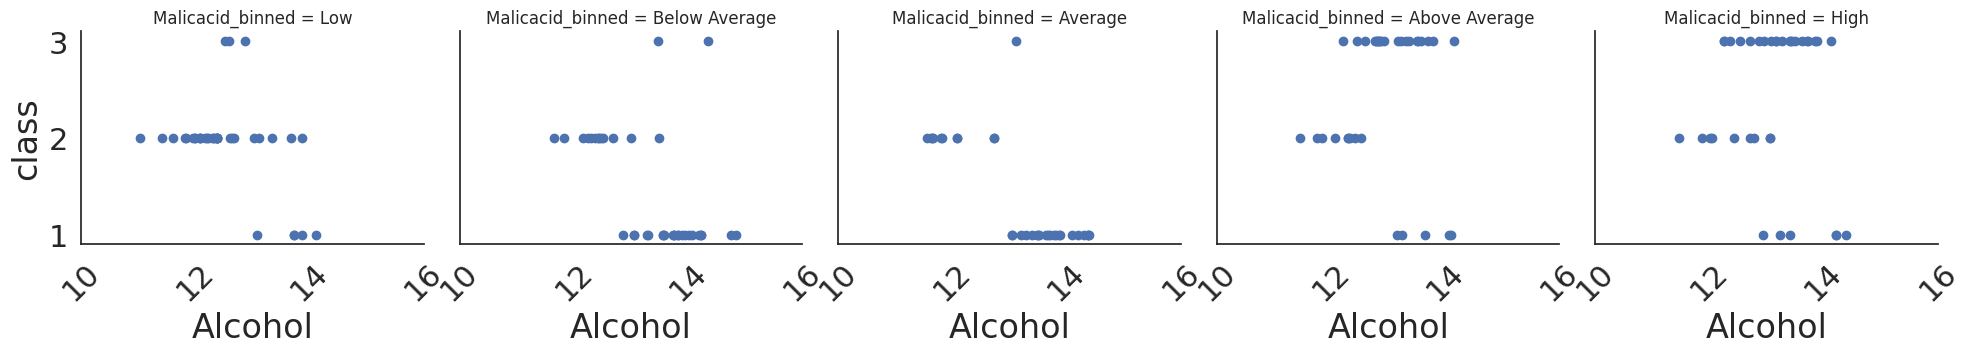

In [78]:
# this plot shows the population of Malicacid depending on class and Alcohol
sns.set(rc={'figure.figsize': (20, 10)}, style='white', font_scale=2)
if pd.api.types.is_numeric_dtype(wine['Malicacid']):
    wine['Malicacid_binned'] = pd.qcut(wine['Malicacid'], 5, labels=['Low', 'Below Average', 'Average', 'Above Average', 'High'])
    col_param = 'Malicacid_binned'
else:
    col_param = 'Malicacid'
g = sns.FacetGrid(wine, col=col_param, height=4)
g.map(plt.scatter, 'Alcohol', 'class')
g.set_titles(size=12)
g.set_xticklabels(rotation=45)

plt.show()

Correlation between the columns of Automobile

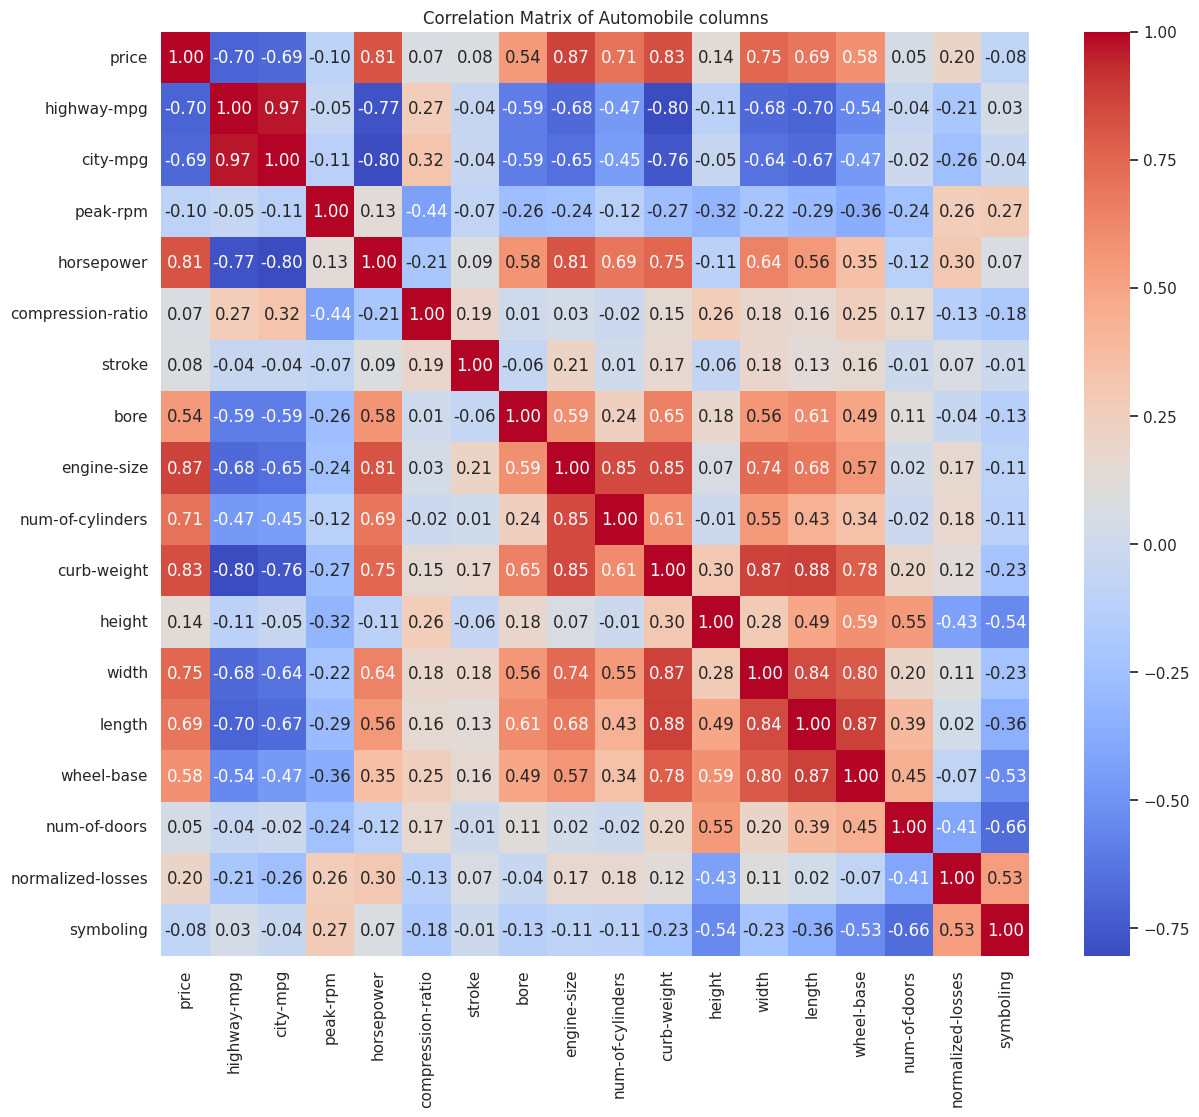

In [114]:
numeric_val = atmb.select_dtypes(include=[float, int])
correlation_matrix = numeric_val.corr()

sns.set(style='white')
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Automobile columns')
plt.show()

Correlation between the columns of Wine

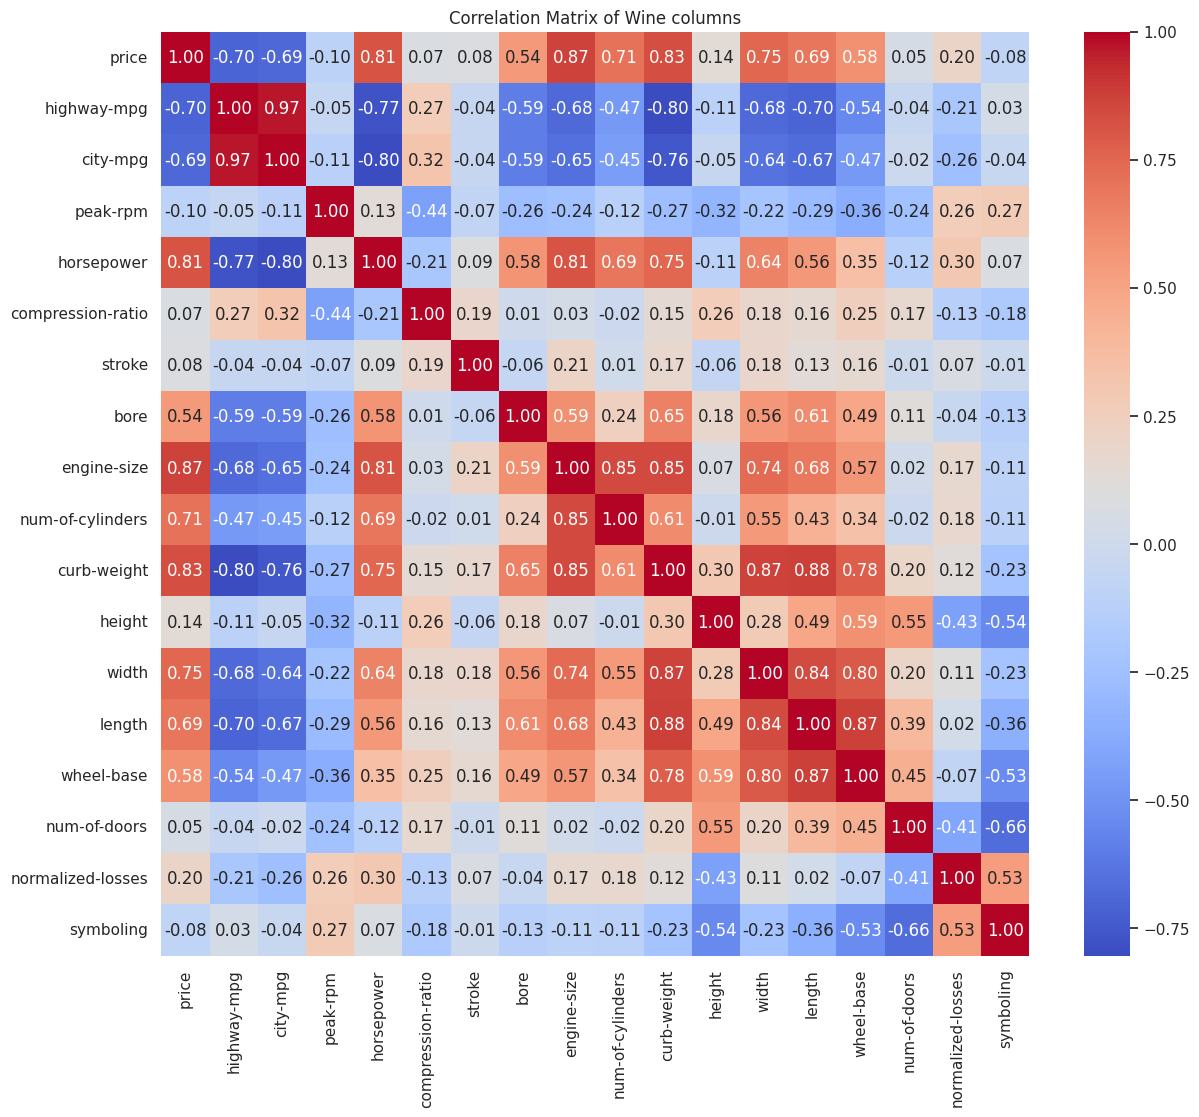

In [113]:
correlation_wine = numeric_val.corr()

sns.set(style='white')
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_wine, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine columns')
plt.show()

Distribution of each features of automobile

In [92]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_val.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(numeric_val[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 9, not 10

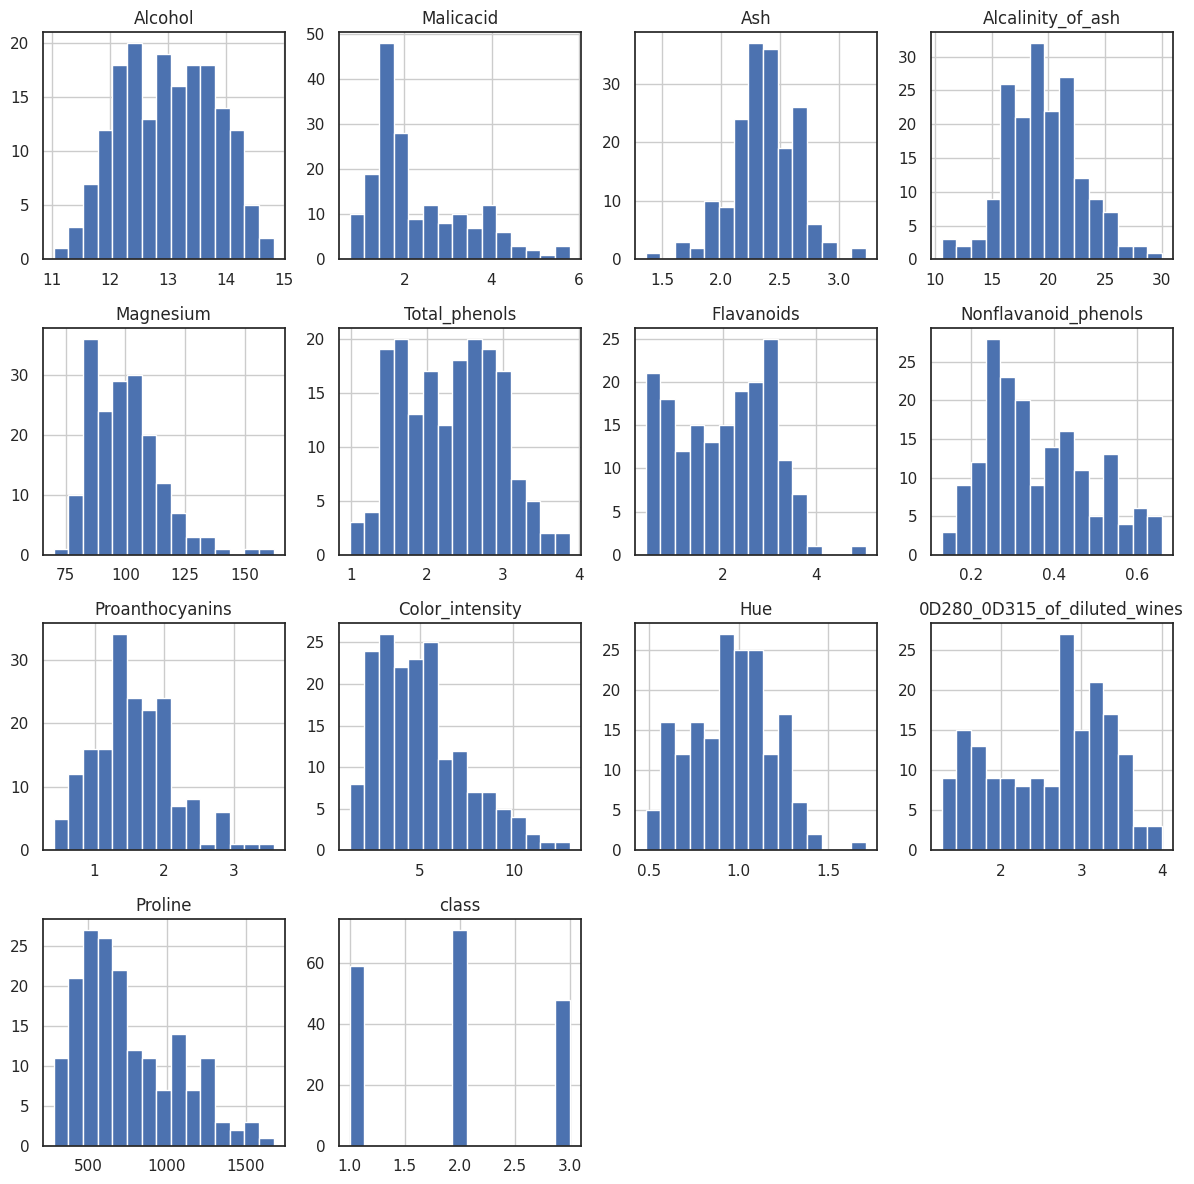

In [94]:
wine.hist(bins=15, figsize=(12, 12))
plt.tight_layout()
plt.show()

#Explore relationships between the features of automobile and wine

In [110]:
sns.pairplot(atmb)

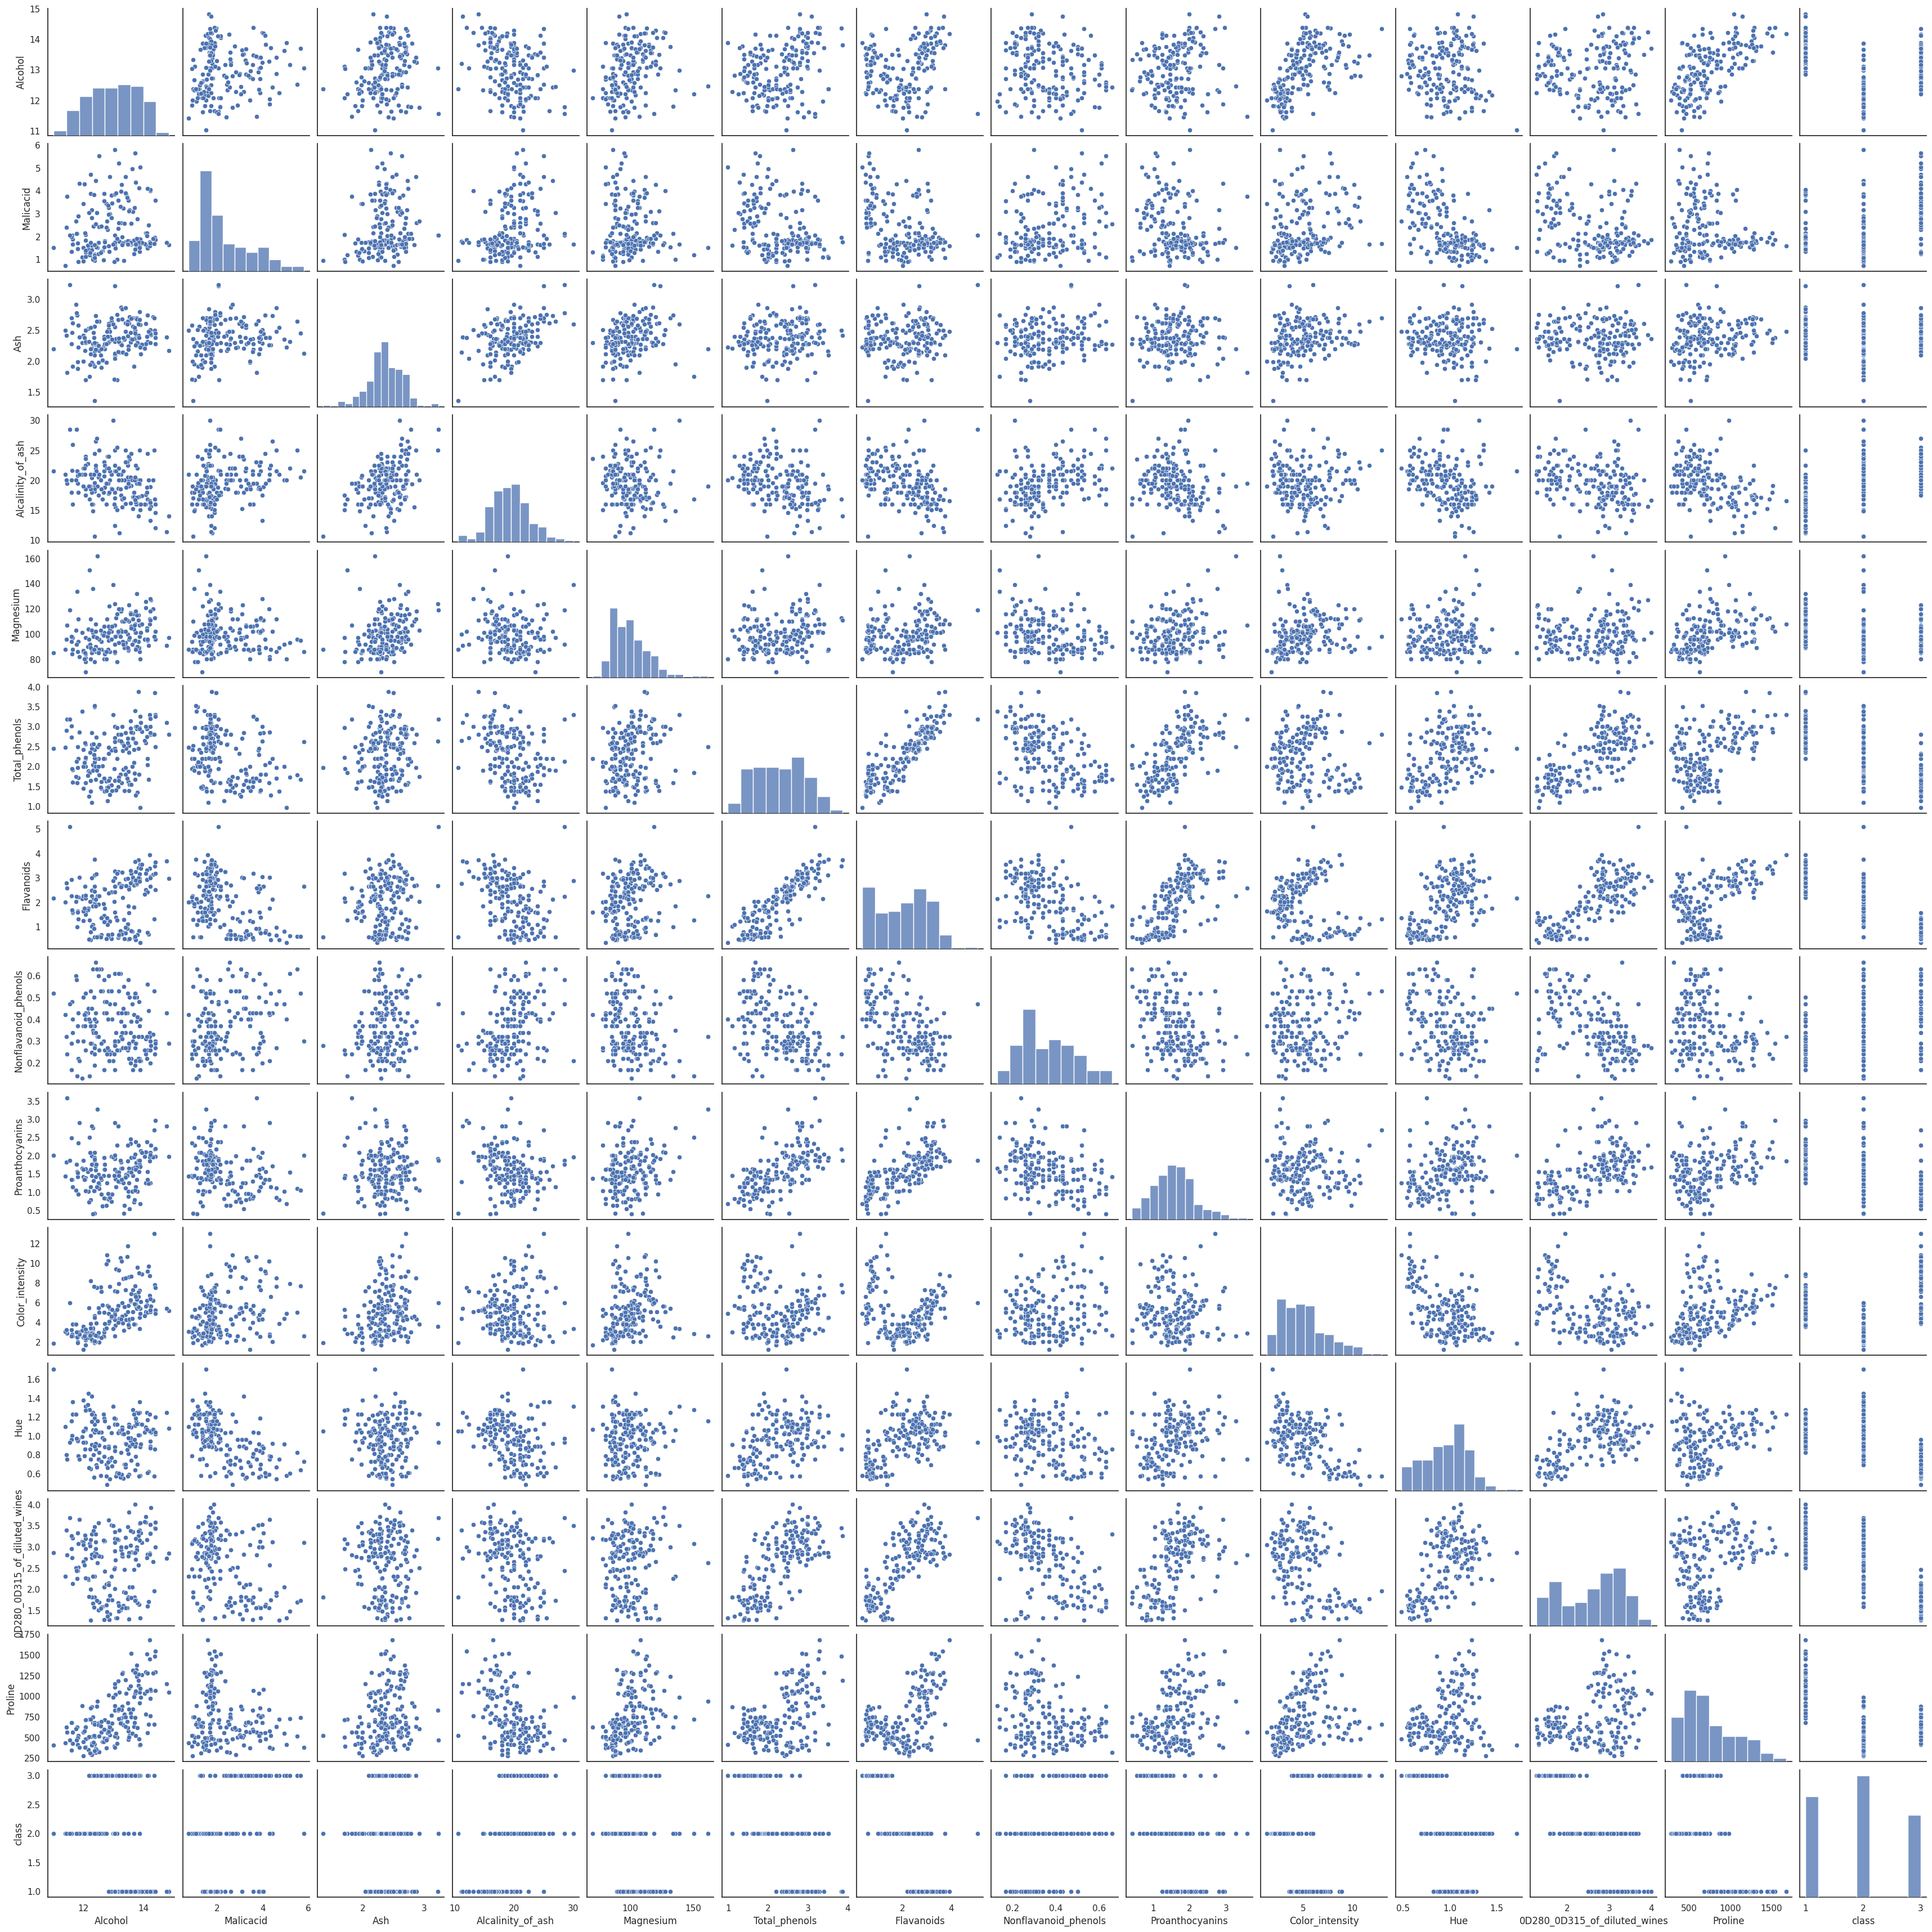

In [111]:
sns.pairplot(wine)

#**Linear Regression Analysis**

In [134]:
atmb['price'].corr(atmb['horsepower'])

0.8105330821322059

In [135]:
sns.regplot(x=atmb['price'],y=atmb['horsepower'])

<Axes: xlabel='price', ylabel='horsepower'>

The analysis between the price range and the horsepower of a automobile indicates that the higher horsepower tends to be associated with higher prices.

#**Logistic Regression Analysis**

In [136]:
sns.lmplot(x='Alcohol',y='Malicacid',data=wine)
plt.yticks(wine['Malicacid'].unique())

([<matplotlib.axis.YTick at 0x787060976a70>,
 [Text(0, 1.71, '1.71'),
  Text(0, 1.78, '1.78'),
  Text(0, 2.36, '2.36'),
  Text(0, 1.95, '1.95'),
  Text(0, 2.59, '2.59'),
  Text(0, 1.76, '1.76'),
  Text(0, 1.87, '1.87'),
  Text(0, 2.15, '2.15'),
  Text(0, 1.64, '1.64'),
  Text(0, 1.35, '1.35'),
  Text(0, 2.16, '2.16'),
  Text(0, 1.48, '1.48'),
  Text(0, 1.73, '1.73'),
  Text(0, 1.81, '1.81'),
  Text(0, 1.92, '1.92'),
  Text(0, 1.57, '1.57'),
  Text(0, 1.59, '1.59'),
  Text(0, 3.1, '3.10'),
  Text(0, 1.63, '1.63'),
  Text(0, 3.8, '3.80'),
  Text(0, 1.86, '1.86'),
  Text(0, 1.6, '1.60'),
  Text(0, 2.05, '2.05'),
  Text(0, 1.77, '1.77'),
  Text(0, 1.72, '1.72'),
  Text(0, 1.9, '1.90'),
  Text(0, 1.68, '1.68'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.66, '1.66'),
  Text(0, 1.83, '1.83'),
  Text(0, 1.53, '1.53'),
  Text(0, 1.8, '1.80'),
  Text(0, 1.65, '1.65'),
  Text(0, 3.99, '3.99'),
  Text(0, 3.84, '3.84'),
  Text(0, 1.89, '1.89'),
  Text(0, 3.98, '3.98'),
  Text(0, 4.04, '4.04'),
  Text(0, 3

#Conclusion

Before making any predictions, I examined the data to understand its condition and identified areas needing improvement, a step known as exploratory data analysis. Using linear regression, I aimed to analyze the relationship between the price and horsepower of automobiles, exploring how these factors influence each other. With logistic regression, I focused on categorizing data, such as determining if a wine is high quality, by evaluating features like alcohol content and malic acid levels in the wine dataset.